In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from itertools import product

In [4]:
fontsize = 14

# Preparations

As a reminder, our $f$ function is defined as follows :
$$
    f\big(s(x_i, t)\big) = \big(1 + e^{-K \, s(x_i, t)}\big)^{-\kappa}
$$

This means we need to load the computed $s(x_i, t)$ and the fitted parameters $K$ and $\kappa$. Our figure will additionally contrast this function with our carrying capacity $r_0$.

In [5]:
def f(s, K, kappa):
    return (1 + np.exp(-K*s)) ** (-kappa)

## Computed $s(x_i, t)$

In [6]:
s = np.load("substrate/computed.npy")

In [7]:
sold = np.load("../experimental/substrate/computed.npy")

Let's also get the dimensions of our plates :

In [8]:
n_plates, n_rows, n_columns, n_points = s.shape
plates, rows, columns, points = map(np.arange, s.shape)

## Model parameters

Let's first load the parameters $K$ and $\kappa$, which are diffusion model parameters :

In [9]:
params = pd.read_csv("diffusion-parameters/optimal.csv")[["K", "kappa"]]

In [10]:
pold = pd.read_csv("../experimental/diffusion-parametres/optimal.csv")[["K", "kappa"]]

Then let's load the $r_0$ :

In [11]:
r0s = pd.read_csv("alpha/params.csv")["r0 i"].unique()

In [12]:
r0sold = pd.read_csv("../experimental/alpha/params.csv")["r0 i"].unique()

# Figure

In [13]:
s[:, 3:-3, 3:-3].shape

(4, 32, 48, 208)

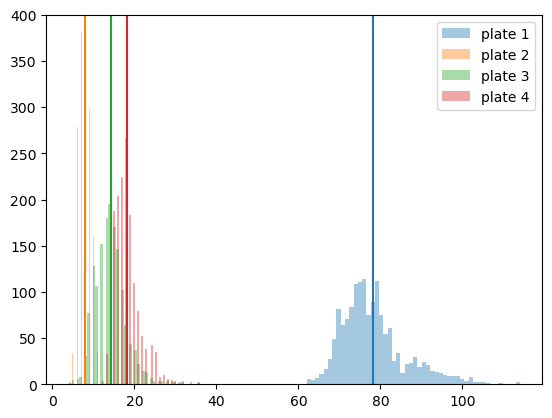

In [14]:
for p in plates:
    plt.hist((s[p, 3:-3, 3:-3] <= 0).argmax(axis = -1).reshape(-1), bins = 50, alpha = 0.4, label = f"plate {p+1}")
    plt.axvline((s[p, 3:-3, 3:-3] <= 0).argmax(axis = -1).mean(), color = ("tab:blue", "tab:orange", "tab:green", "tab:red")[p])
plt.legend();

In [15]:
(s[:, 3:-3, 3:-3] <= 0).reshape(((4, -1, n_points))).argmax(axis = -1).mean(axis = -1)

array([78.27734375,  7.80924479, 14.1875    , 18.26171875])

/tmp/ipykernel_185124/973019728.py:2: RuntimeWarning: overflow encountered in exp
  return (1 + np.exp(-K*s)) ** (-kappa)


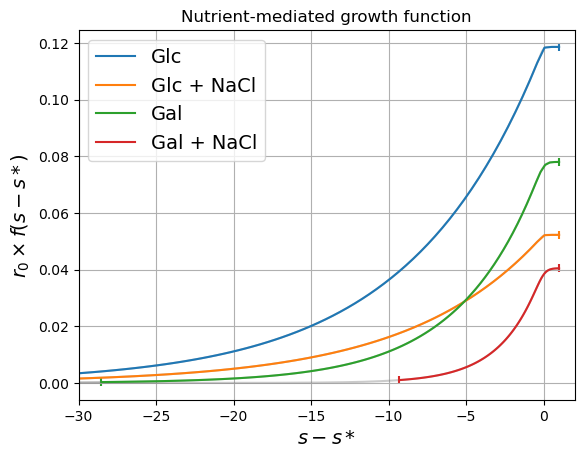

In [17]:
fig, ax = plt.subplots()

colors = ["tab:red", "tab:blue", "tab:orange", "tab:green"]
indexes = [1, 2, 3, 0]
names = ["Glc", "Glc + NaCl", "Gal", "Gal + NaCl"]

for p in indexes:
    k, kappa = params.loc[p]
    xs = np.linspace(-30, 1, 200)
    ax.plot(xs, r0s[p] * f(xs, K = k, kappa = kappa), color = "tab:gray", alpha = 0.4)
ax.set_xlim(-30, 2)

for p, env in zip(indexes, names):
    k, kappa = params.loc[p]
    x = np.linspace(s[p].min(), s[p].max(), 100)
    y = f(x, K = k, kappa = kappa)
    ax.plot(x, r0s[p] * f(x, K = k, kappa = kappa), label = env, color = colors[p])
    ms = s[p, 3:-3, 3:-3].reshape((-1, n_points)).mean(axis = 0)
    sf = ms[-1]
    f0, ff = f(0, K = k, kappa = kappa), f(sf, K = k, kappa = kappa)
#    ax.scatter([0, sf], [r0s[p] * f0, r0s[p] * ff], color = colors[p], marker = 'x')
    ax.scatter([x[0], x[-1]], [r0s[p] * y[0], r0s[p] * y[-1]], color = colors[p], marker = '|')
ax.legend(fontsize = fontsize)
ax.set_xlabel(r"$s - s*$", fontsize = fontsize)
ax.set_ylabel(r"$r_0 \times f(s - s*)$", fontsize = fontsize)
ax.set_title("Nutrient-mediated growth function")
ax.grid()

fig.savefig(f"plots/figure-5/f-function.pdf", bbox_inches = "tight")
fig.savefig(f"plots/figure-5/f-function.png", bbox_inches = "tight");

In [ ]:
fig, ax = plt.subplots()
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
names = ("Gal + NaCl", "Glc", "Glc + NaCl", "Gal")

for p in plates:
    k, kappa = params.loc[p]
    xs = np.linspace(-80, 20, 200)
    ax.plot(k * xs, r0s[p] * f(xs, K = k, kappa = kappa), color = "tab:gray", alpha = 0.4)
ax.set_xlim(-650, 25)

for p in plates:
    k, kappa = params.loc[p]
    x = np.linspace(s[p].min(), s[p].max(), 100)
    y = f(x, K = k, kappa = kappa)
    ax.plot(k * x, r0s[p] * y, label = names[p], color = colors[p])
    ax.scatter([k * x[0], k * x[-1]], [r0s[p] * y[0], r0s[p] * y[-1]], color = colors[p], marker = '|')
ax.legend(fontsize = fontsize)
ax.set_xlabel(r"$K\times(s - s*)$", fontsize = fontsize)
ax.set_ylabel(r"$r_0 \times f(s - s*)$", fontsize = fontsize)
ax.set_title("Nutrient-mediated growth function")

fig.savefig(f"plots/figure-5/f-function.pdf", bbox_inches = "tight")
fig.savefig(f"plots/figure-5/f-function.png", bbox_inches = "tight");

In [ ]:
fig, ax = plt.subplots()
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
names = ("Gal + NaCl", "Glc", "Glc + NaCl", "Gal")

for p in plates:
    k, kappa = params.loc[p]
    xs = np.linspace(-80, 20, 200)
    ax.plot(xs, r0s[p] * f(xs, K = k, kappa = kappa), color = "tab:gray", alpha = 0.4)
for p in plates:
    k, kappa = pold.loc[p]
    xs = np.linspace(-80, 20, 200)
    ax.plot(xs, r0sold[p] * f(xs, K = k, kappa = kappa), linestyle = ":", color = "tab:gray", alpha = 0.4)
ax.set_xlim(-50, 5)

for p in plates:
    k, kappa = pold.loc[p]
    x = np.linspace(sold[p].min(), sold[p].max(), 100)
    y = f(x, K = k, kappa = kappa)
    ax.plot(x, r0sold[p] * y, linestyle = ":", color = colors[p])
    ax.scatter([x[0], x[-1]], [r0sold[p] * y[0], r0sold[p] * y[-1]], color = colors[p], marker = '|')
for p in plates:
    k, kappa = params.loc[p]
    x = np.linspace(s[p].min(), s[p].max(), 100)
    y = f(x, K = k, kappa = kappa)
    ax.plot(x, r0s[p] * y, label = names[p], color = colors[p])
    ax.scatter([x[0], x[-1]], [r0s[p] * y[0], r0s[p] * y[-1]], color = colors[p], marker = '|')
ax.legend(fontsize = fontsize)
ax.set_xlabel(r"$s - s*$", fontsize = fontsize)
ax.set_ylabel(r"$r_0 \times f(s - s*)$", fontsize = fontsize)
ax.set_title("Nutrient-mediated growth function");

In [ ]:
pd.read_csv("diffusion-parameters/optimal.csv")

In [ ]:
pd.read_csv("diffusion-parameters/optimal.csv")["D"].std()